# Airline Passenger Prediction Project
In this project I am going to create a LSTM model that can predict future passenger count by analysing past data .
I use tensorflow.keras library in this project from where i can import LSTM model.

# Step1 : Import all important  libraries 

In [1]:
import numpy as np  
import pandas as pd    
import matplotlib.pyplot as plt  
import math
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Step2 : Load Dataset and drive important information and analyse trends

In [2]:
df = pd.read_csv("international-airline-passengers.csv",skipfooter  = 5)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_19548\1233111443.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("international-airline-passengers.csv",skipfooter  = 5)


In [3]:
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.shape

(141, 2)

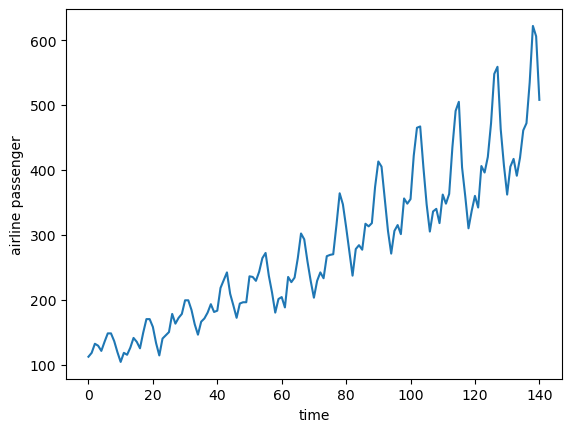

In [5]:
# Now we plot the airline passengers to see the trend
dataset = df.iloc[:,1].values
# print(dataset)
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("airline passenger")
plt.show()

# Step3 : now we do some data preprocessing 
1. data scaling
2. reshaping
3. train test split

In [6]:
dataset = dataset.reshape(-1,1)  
#print(dataset)
dataset = dataset.astype("float32")
#print(dataset)
dataset.shape

(141, 1)

In [7]:
# scaling >>> Min Max Scaler
scaler = MinMaxScaler(feature_range = (0,1))
dataset = scaler.fit_transform(dataset)
print(dataset)

[[0.01544401]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984557]
 [0.08494207]
 [0.08494207]
 [0.06177607]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123553]
 [0.04247104]
 [0.07142857]
 [0.05984557]
 [0.04054055]
 [0.08687258]
 [0.12741312]
 [0.12741312]
 [0.10424709]
 [0.05598456]
 [0.01930502]
 [0.06949806]
 [0.07915059]
 [0.08880308]
 [0.14285713]
 [0.11389962]
 [0.13127413]
 [0.14285713]
 [0.18339768]
 [0.18339768]
 [0.15444016]
 [0.11196911]
 [0.08108109]
 [0.1196911 ]
 [0.12934363]
 [0.14671814]
 [0.17181468]
 [0.14864865]
 [0.15250966]
 [0.22007722]
 [0.24324325]
 [0.26640925]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374519]
 [0.17760617]
 [0.17760617]
 [0.25482625]
 [0.25289574]
 [0.24131274]
 [0.26833975]
 [0.3088803 ]
 [0.32432434]
 [0.25675675]
 [0.20656371]
 [0.14671814]
 [0.18725869]
 [0.19305018]
 [0.16216215]
 [0.25289574]
 [0.23745173]
 [0.25096524]
 [0.3088803 ]
 [0.38223937]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.1911197 ]
 [0.24

In [8]:
# Now i split my dataset into training and testing 
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 70, test size: 71 


In [9]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)  


In [10]:
trainX[1]

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
       0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ],
      dtype=float32)

In [11]:
trainY[0]

0.0

In [12]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)  

In [13]:
testX[1]

array([0.24131274, 0.26640925, 0.24903473, 0.31467178, 0.3185328 ,
       0.32046333, 0.4073359 , 0.5019305 , 0.46911195, 0.40154442],
      dtype=float32)

In [14]:
testY[9]

0.52123547

In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
trainX

array([[[0.01544401, 0.02702703, 0.05405405, 0.04826255, 0.03281853,
         0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753]],

       [[0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984557,
         0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ]],

       [[0.05405405, 0.04826255, 0.03281853, 0.05984557, 0.08494207,
         0.08494207, 0.06177607, 0.02895753, 0.        , 0.02702703]],

       [[0.04826255, 0.03281853, 0.05984557, 0.08494207, 0.08494207,
         0.06177607, 0.02895753, 0.        , 0.02702703, 0.02123553]],

       [[0.03281853, 0.05984557, 0.08494207, 0.08494207, 0.06177607,
         0.02895753, 0.        , 0.02702703, 0.02123553, 0.04247104]],

       [[0.05984557, 0.08494207, 0.08494207, 0.06177607, 0.02895753,
         0.        , 0.02702703, 0.02123553, 0.04247104, 0.07142857]],

       [[0.08494207, 0.08494207, 0.06177607, 0.02895753, 0.        ,
         0.02702703, 0.02123553, 0.04247104, 0.07142857, 0.05984557]],

       [[0.08

# Step4 : LSTM Model 

In [17]:
model = Sequential()
model.add(LSTM(10,input_shape = (1,time_stemp)))
model.add(Dense(1))

C:\Users\lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 851 (3.32 KB)

 Trainable params: 851 (3.32 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.fit(trainX,trainY,epochs = 50,batch_size = 1)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0515
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0130
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037  
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030  
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032  
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0034
Epoch 13/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041
Epoch 14/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0027
Epoch 15/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0023   
Epoch 16/5

# Step5 : Model Prediction

In [21]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [22]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 17.83 RMSE
Test Score: 40.36 RMSE


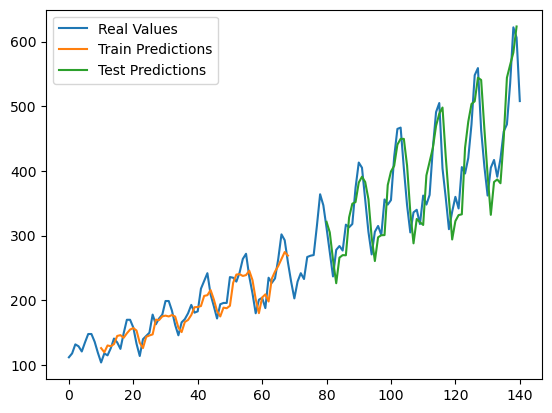

In [23]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label = "Real Values")
plt.plot(trainPredictPlot, label = "Train Predictions")
plt.plot(testPredictPlot, label = "Test Predictions")
plt.legend()
plt.show()